In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from datetime import datetime as dt

In [2]:
df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Tập dữ liệu này bao gồm 1 triệu giao dịch của hơn 800 nghìn khách hàng cho một ngân hàng ở Ấn Độ. Dữ liệu chứa các thông tin như - tuổi khách hàng (DOB), vị trí, giới tính, số dư tài khoản tại thời điểm giao dịch, chi tiết giao dịch, số tiền giao dịch, v.v.¶

## Data Preparation and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

### Handling missing values

In [5]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

<AxesSubplot:>

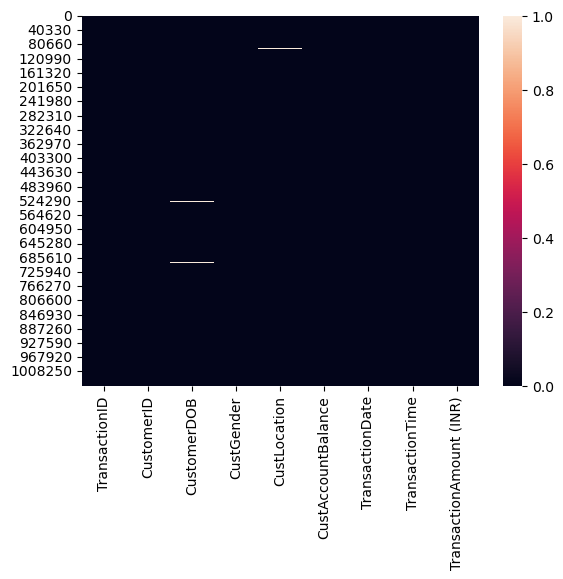

In [6]:
sns.heatmap(df.isnull(), cbar= True)

dựa vào biểu đồ heatmap ở trên ta thấy rằng có 1 số missing values tồn tại trong dataset.  Có 3397 missing value ở cột CustomerDOB, 1100 ở cột CustGender, 151 ở cột CustLocation, và 2369 ở cột CustAccountBalance. Chúng ta sẽ xử lý trước khi đưa vào quá trình EDA

In [7]:
df.shape

(1048567, 9)

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [10]:
## kiểm tra duplicated transactions
df.duplicated().sum()

0

#### Checking Outliers

In [11]:
# Next, we check CustAccountBalance and TransactionAmount (INR) for outliers.
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T


,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


Sử dụng hàm mô tả, chúng ta thấy một số thống kê mô tả cho các biến của mình. Lưu ý rằng cũng có CustAccountBalance và TransactionAmount (INR) max lớn so với phân vị thứ 75 của chúng.

In [12]:
# Kiểm tra max của CustAccountBalance.
df[df['CustAccountBalance'] == df['CustAccountBalance'].max()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
40982,T40983,C2916865,3/8/67,M,SHILLONG,115035495.1,27/9/16,224912,6959.00
656264,T656265,C3316830,3/8/67,M,SHILLONG,115035495.1,28/8/16,231112,28019.32
789085,T789086,C6416825,3/8/67,M,SHILLONG,115035495.1,5/9/16,100606,5864.00
826721,T826722,C2216823,3/8/67,M,SHILLONG,115035495.1,4/9/16,141239,4699.00
835641,T835642,C2916887,3/8/67,M,SHILLONG,115035495.1,4/9/16,93141,600.00
876392,T876393,C8116818,3/8/67,M,SHILLONG,115035495.1,8/9/16,214355,3149.00
879623,T879624,C4316889,3/8/67,M,SHILLONG,115035495.1,8/9/16,213612,4364.00
1001213,T1001214,C5916881,3/8/67,M,SHILLONG,115035495.1,14/9/16,160123,1599.00
1002072,T1002073,C5116828,3/8/67,M,SHILLONG,115035495.1,14/9/16,151418,5060.00
1002847,T1002848,C7716886,3/8/67,M,SHILLONG,115035495.1,14/9/16,153335,3604.00


In [13]:
# Kiểm tra max của TransactionAmount (INR).
df[df['TransactionAmount (INR)'] == df['TransactionAmount (INR)'].max()] 

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
399117,T399118,C7319271,25/5/76,M,GURGAON,42487.89,18/8/16,132711,1560034.99


### Data preparation

In [14]:
df.CustGender.unique()

array(['F', 'M', 'T'], dtype=object)

In [15]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

Chúng ta thấy rằng có 1 bản ghi có giới tính là T, ví nó chiếm tỉ lệ quá nhỏ nên ta sẽ bỏ hàng đó. Điều này sẽ không làm ảnh hưởng đến kết quả của phân tích

In [16]:
df.drop((df[df.CustGender == 'T']).index, inplace = True)

In [17]:
df.CustGender.unique()

array(['F', 'M'], dtype=object)

In [18]:
# Chuyển đổi TransactionDate và CustomerDOB thành định dạng ngày giờ bằng cách sử dụng hàm pd.to_datetime()
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'],format='%d/%m/%y', errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y', errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustomerDOB              985322 non-null   datetime64[ns]
 3   CustGender               1041613 non-null  object        
 4   CustLocation             1041613 non-null  object        
 5   CustAccountBalance       1041613 non-null  float64       
 6   TransactionDate          1041613 non-null  datetime64[ns]
 7   TransactionTime          1041613 non-null  int64         
 8   TransactionAmount (INR)  1041613 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [20]:
# Ở đây sẽ sử dụng năm trong dữ liệu (2016) làm cơ sở để lấy tuổi của khách hàng
df['CustAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CustAge'].value_counts()

 26.0    72616
 25.0    71185
 27.0    69156
 24.0    66484
 28.0    62905
         ...  
-4.0         2
 5.0         2
 0.0         2
-9.0         1
-2.0         1
Name: CustAge, Length: 99, dtype: int64

In [21]:
# kiểm tra phân phối tuổi
df['CustAge'].describe()

count    985322.000000
mean         25.533262
std          17.788631
min         -52.000000
25%          24.000000
50%          28.000000
75%          33.000000
max          47.000000
Name: CustAge, dtype: float64

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustAge'>

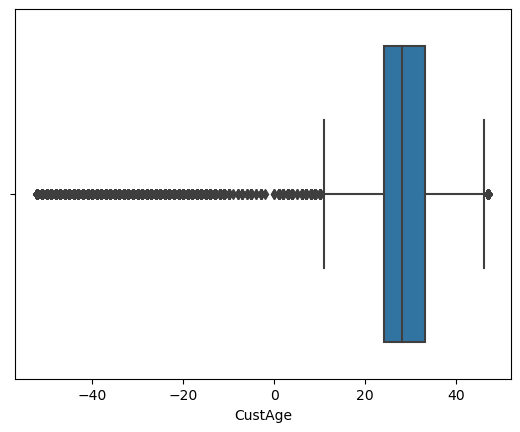

In [22]:
sns.boxplot(df['CustAge'])

Chúng ta có thể thấy có sự mâu thuẫn ở cột Tuổi. Có tối thiểu -52

Chúng ta có thể chuyển đổi tất cả các độ tuổi dưới 12 và trên 100 phần trăm thành độ tuổi trung bình. 

In [23]:
df.loc[(df['CustAge'] < 12) | (df['CustAge'] >= 100),'CustAge']= df['CustAge'].median()

In [24]:
df = df.copy()

In [25]:
df.drop(columns = ['CustomerDOB','TransactionTime'], axis = 1, inplace = True)

In [26]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.0
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,27999.0,28.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,459.0,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,2060.0,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,1762.5,28.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustGender               1041613 non-null  object        
 3   CustLocation             1041613 non-null  object        
 4   CustAccountBalance       1041613 non-null  float64       
 5   TransactionDate          1041613 non-null  datetime64[ns]
 6   TransactionAmount (INR)  1041613 non-null  float64       
 7   CustAge                  985322 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 71.5+ MB


In [28]:
#slpit the day & month names from the date 
df['day'] = df['TransactionDate'].dt.day_name()
df['month'] = df['TransactionDate'].dt.month_name()
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge,day,month
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.0,Tuesday,August
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,27999.0,28.0,Tuesday,August
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,459.0,20.0,Tuesday,August
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,2060.0,43.0,Tuesday,August
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,1762.5,28.0,Tuesday,August


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustGender               1041613 non-null  object        
 3   CustLocation             1041613 non-null  object        
 4   CustAccountBalance       1041613 non-null  float64       
 5   TransactionDate          1041613 non-null  datetime64[ns]
 6   TransactionAmount (INR)  1041613 non-null  float64       
 7   CustAge                  985322 non-null   float64       
 8   day                      1041613 non-null  object        
 9   month                    1041613 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 87.4+ MB


In [30]:
df.describe()

,CustAccountBalance,TransactionAmount (INR),CustAge
count,1.041613e+06,1.041613e+06,985322.000000
mean,1.149987e+05,1.566066e+03,29.469881
std,8.467613e+05,6.561398e+03,5.967167
min,0.000000e+00,0.000000e+00,12.000000
25%,4.728140e+03,1.600000e+02,25.000000
50%,1.676852e+04,4.575000e+02,28.000000
75%,5.742885e+04,1.200000e+03,33.000000
max,1.150355e+08,1.560035e+06,47.000000


## EDA

### Customer Demographic
- What is the distribution of customers by gender (CustGender)?
- What is the age distribution of customers based on the "CustomerDOB" column?
- Which location has the highest number of customers (CustLocation)?

In [31]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge,day,month
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.0,Tuesday,August
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,27999.0,28.0,Tuesday,August
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,459.0,20.0,Tuesday,August
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,2060.0,43.0,Tuesday,August
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,1762.5,28.0,Tuesday,August


### Nam hay nữ sẽ giao dịch nhiều hơn?

In [32]:
df.groupby('CustGender')['TransactionID'].count()

CustGender
F    280635
M    760978
Name: TransactionID, dtype: int64

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


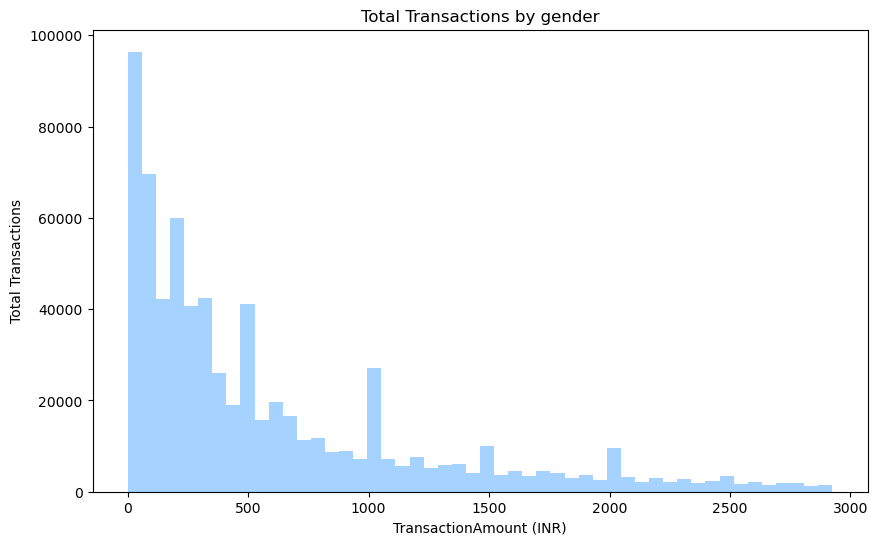

In [33]:
plt.figure(figsize = (10,6))
sns.distplot(df[(df['CustGender'] == 'M') & (df['TransactionAmount (INR)'] < np.percentile(df['TransactionAmount (INR)'], 90))]['TransactionAmount (INR)'],
                     label = True, kde = False, color = 'dodgerblue')
plt.title('Total Transactions by gender')
plt.xlabel('TransactionAmount (INR)')
plt.ylabel('Total Transactions')
plt.show()

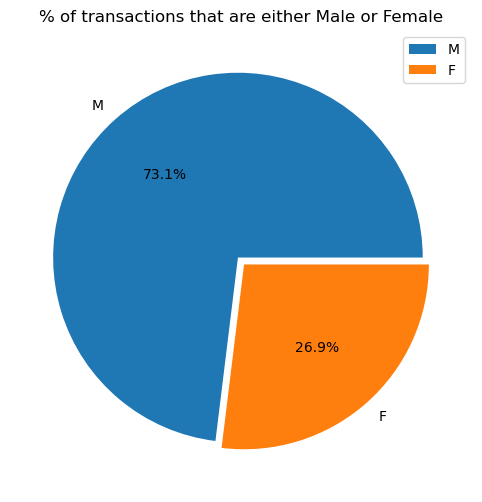

In [34]:
plt.figure(figsize=(12,6))
plt.title('% of transactions that are either Male or Female')
g= plt.pie(df.CustGender.value_counts(), explode = (0.025,0.025), autopct = '%1.1f%%', labels = df.CustGender.value_counts().index)
plt.legend()
plt.show()

Có 760978 giao dịch là nam và 280635 giao dịch là nữ với giao dịch là nam chiếm đa số. Điều này có thể là do thu nhập người nam cao hơn nữ hoặc do về quyết định tài chính trong gia đình vẫn do nam giới đảm nhận

#### Phân phối độ tuổi của khách hàng

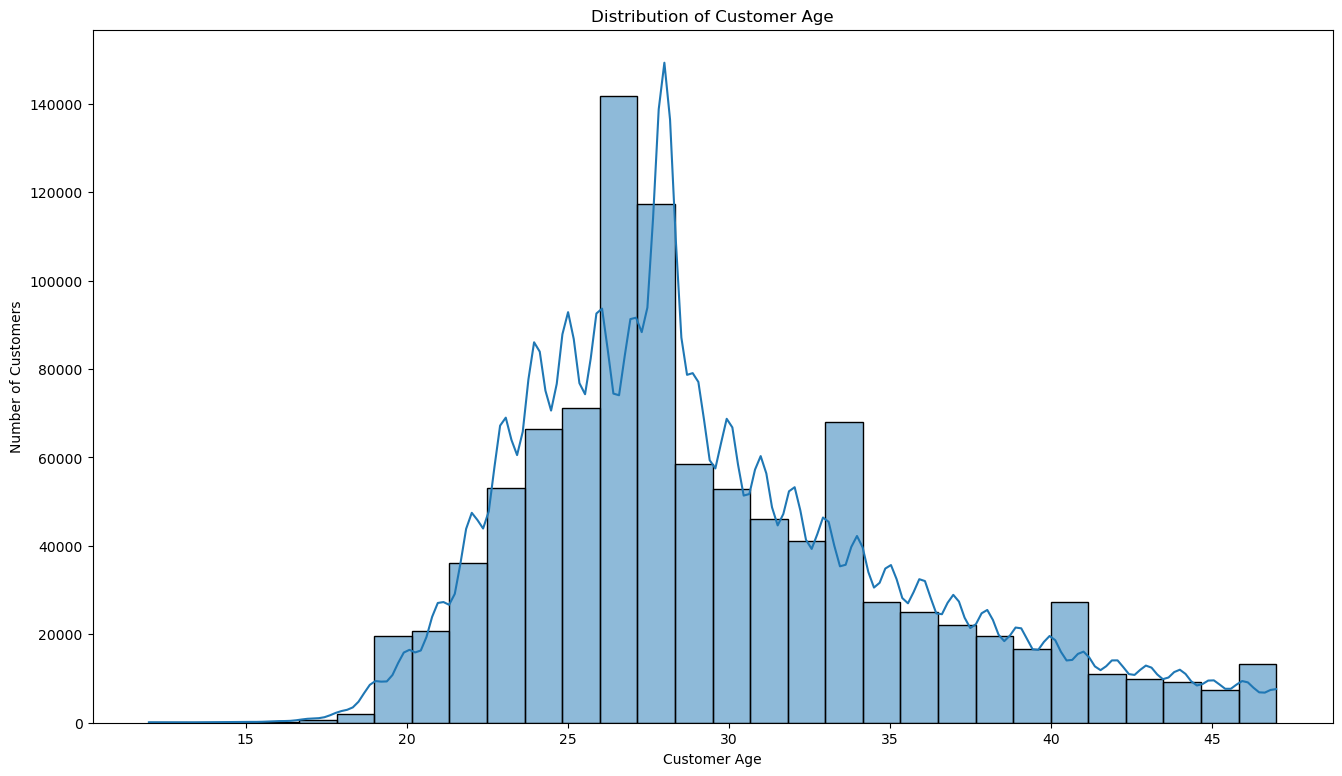

In [35]:
plt.figure(figsize = (16,9))
sns.histplot(x= df.CustAge, kde = True, bins =30, palette = 'husl')
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.show()

- Khách hàng giao dịch có độ tuổi chủ yếu từ 20-30 và 30-40.

#### Location

In [36]:
location_counts = df['CustLocation'].value_counts().nlargest(10)
location_counts

MUMBAI       101997
NEW DELHI     84143
BANGALORE     81330
GURGAON       73594
DELHI         70549
NOIDA         32656
CHENNAI       29839
PUNE          25690
HYDERABAD     22976
THANE         21397
Name: CustLocation, dtype: int64

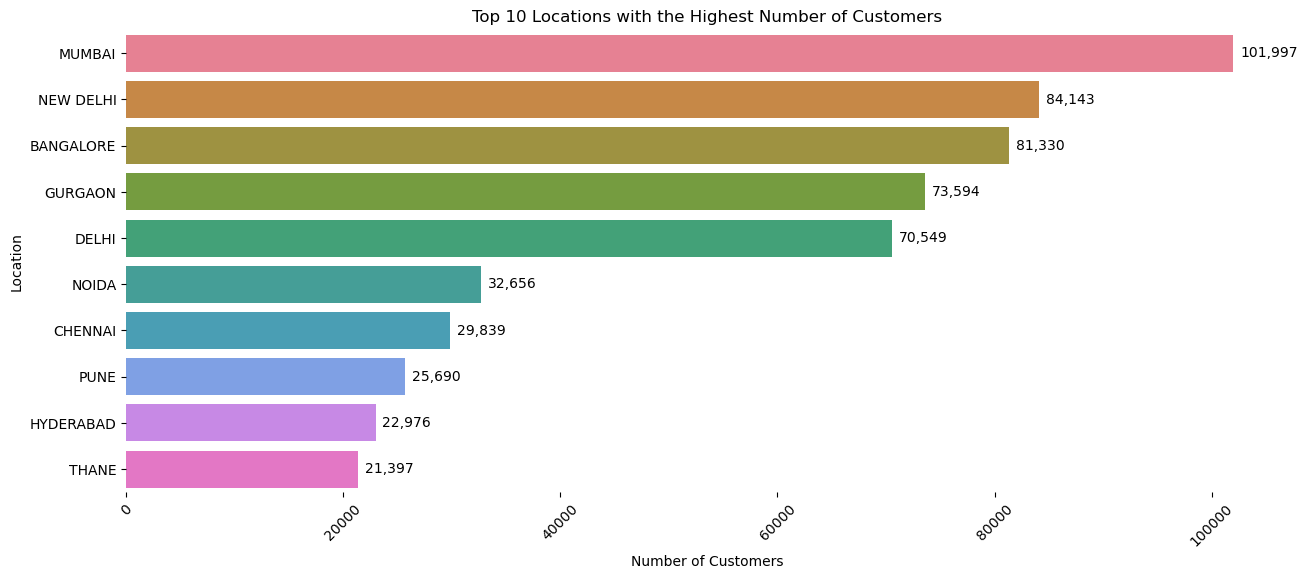

In [37]:
plt.figure(figsize = (15,6))
ax = sns.barplot(y = location_counts.index, x = location_counts.values, palette = 'husl')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.xticks(rotation=45)

# Remove figure border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(format(int(p.get_width()),','),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext = (5,0), textcoords= 'offset points', ha = 'left', va='center')

plt.show()

Như đã thấy từ biểu đồ trên, Mumbai, New Delhi, Bangalore, Gurgaon và Delhi là 5 thành phố hàng đầu có số lượng giao dịch nhiều nhất. Điều này có thể là do 3 thành phố có dân số đông hơn, điều kiện kinh tế tốt hơn và mức lương cao hơn.

### 2. Customer Account and Transaction Analysis

## RFM Analysis

Chúng tôi sẽ phân tích khách hàng dựa trên 3 số liệu dưới đây:
- R (Recency): Số ngày kể từ lần cuối cùng của giao dịch
- F (Frequency): Số giao dịch
- M (Monetary): Tổng số tiền giao dịch

In [38]:
# Calculate Monetary
mon = df.groupby('CustomerID')['TransactionAmount (INR)'].sum()
rfm_m = mon.reset_index()
rfm_m.columns = ['CustomerID','Monetary']
rfm_m

,CustomerID,Monetary
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
879352,C9099836,691.0
879353,C9099877,222.0
879354,C9099919,126.0
879355,C9099941,50.0


In [39]:
# calculate Recency 

max_date = max(df['TransactionDate'])

df['diff'] = (max_date - df['TransactionDate']).dt.days
rec = df.groupby('CustomerID')['diff'].min()
rfm_r = rec.reset_index()
rfm_r.columns = ['CustomerID','Recency']
rfm_r

,CustomerID,Recency
0,C1010011,25
1,C1010012,68
2,C1010014,75
3,C1010018,36
4,C1010024,64
...,...,...
879352,C9099836,75
879353,C9099877,36
879354,C9099919,64
879355,C9099941,54


In [40]:
# Calculate Frequency
fre = df.groupby('CustomerID')['TransactionAmount (INR)'].count()
rfm_f = fre.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f

,CustomerID,Frequency
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
879352,C9099836,1
879353,C9099877,1
879354,C9099919,1
879355,C9099941,1


In [41]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how = 'inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,C1010011,5106.0,2
1,C1010012,1499.0,1
2,C1010014,1455.0,2
3,C1010018,30.0,1
4,C1010024,5000.0,1


In [42]:
rfm = pd.merge(rfm, rfm_r, on = 'CustomerID', how = 'inner')
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,C1010011,5106.0,2,25
1,C1010012,1499.0,1,68
2,C1010014,1455.0,2,75
3,C1010018,30.0,1,36
4,C1010024,5000.0,1,64


In [43]:
df = pd.merge(df, rfm, on = 'CustomerID', how = 'inner')
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge,day,month,diff,Monetary,Frequency,Recency
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.0,Tuesday,August,80,25.0,1,80
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,27999.0,28.0,Tuesday,August,80,27999.0,1,80
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,459.0,20.0,Tuesday,August,80,459.0,1,80
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,2060.0,43.0,Tuesday,August,80,2938.4,2,69
4,T391139,C5342380,M,MUMBAI,3195.78,2016-08-13,878.4,37.0,Saturday,August,69,2938.4,2,69


In [44]:
rfm['R_score'] = np.select(
    [rfm['Recency'] <= 50, rfm['Recency'] <= 100, rfm['Recency'] <= 120, rfm['Recency'] <= 150],  [5,4,3,2], default = 1)

rfm['F_score'] = np.select(
    [rfm['Frequency'] >= 5, rfm['Frequency'] == 4, rfm['Frequency'] == 3, rfm['Frequency'] == 2],  [5,4,3,2], default = 1)

rfm['M_score'] = np.select(
    [rfm['Monetary'] > 2000, rfm['Monetary'] > 1000, rfm['Monetary'] > 500, rfm['Monetary'] > 300],  [5,4,3,2], default = 1)

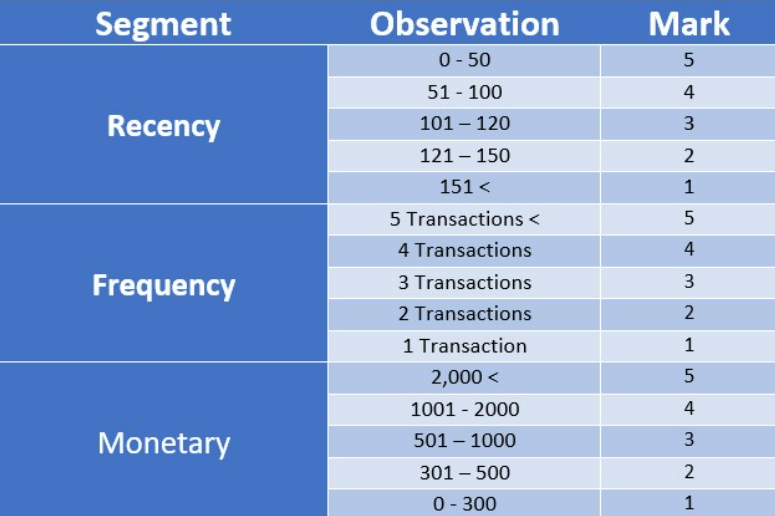

In [45]:
rfm = rfm[['CustomerID','Recency','R_score','Frequency','F_score','Monetary','M_score']]
rfm.head()

,CustomerID,Recency,R_score,Frequency,F_score,Monetary,M_score
0,C1010011,25,5,2,2,5106.0,5
1,C1010012,68,4,1,1,1499.0,4
2,C1010014,75,4,2,2,1455.0,4
3,C1010018,36,5,1,1,30.0,1
4,C1010024,64,4,1,1,5000.0,5


In [46]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,879357.0,55.308264,15.227481,0.0,43.0,55.0,68.0,81.00
R_score,879357.0,4.417726,0.493185,4.0,4.0,4.0,5.0,5.00
Frequency,879357.0,1.184517,0.448954,1.0,1.0,1.0,1.0,6.00
F_score,879357.0,1.184501,0.448801,1.0,1.0,1.0,1.0,5.00
Monetary,879357.0,1855.031690,7188.245223,0.0,200.0,533.0,1500.0,1560034.99
M_score,879357.0,2.675181,1.538248,1.0,1.0,3.0,4.0,5.00


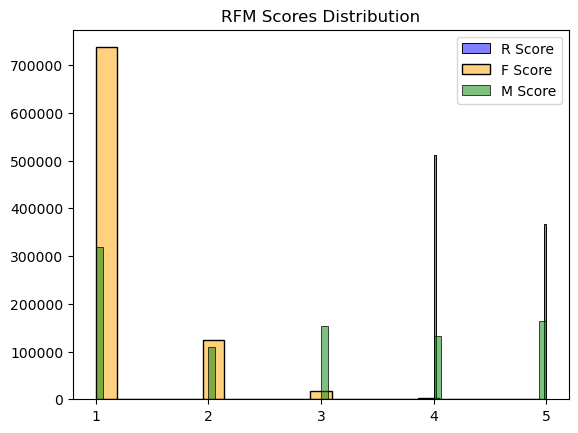

In [47]:
fig, ax = plt.subplots()

sns.histplot(rfm['R_score'], ax = ax, label = 'R Score', color='blue', alpha = 0.5)
sns.histplot(rfm['F_score'], ax = ax, label = 'F Score', color='orange', alpha = 0.5)
sns.histplot(rfm['M_score'], ax = ax, label = 'M Score', color='green', alpha = 0.5)

ax.legend()
plt.xticks(range(1, 6))
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('RFM Scores Distribution')
plt.show()

Từ số liệu thống kê trên, hầu hết các chỉ số Monetary, Recency và Frequency đều quy về mức 1, điều này cho thấy hầu hết khách hàng là khách hàng bình dân và nhóm nhỏ khách hàng đang có ảnh hưởng lớn đến toàn bộ hoạt động của phân phối

Dựa vào điểm trung bình của từng số liệu để quyết định class của từng bản ghi của khách hàng

Ta sẽ sử dụng Mean để làm cơ sở quyết định và gán các bản ghi cao hơn hoặc bằng mean là 1 và các bản ghi thấp hơn mean là loại 0

Ta tính toán mean của các cột R_score, F_score và M_score. Sau đó, sử dụng phép so sánh vector hóa (>=) để so sánh từng phần tử trong cột tương ứng với giá trị thu được chuyển đổi thành số nguyên và chuyển thành chuỗi. Cuối cùng, chọn các cột mong muốn để lưu và dataframe



In [48]:
mean_R_score = rfm['R_score'].mean()
mean_F_score = rfm['F_score'].mean()
mean_M_score = rfm['M_score'].mean()

rfm['R'] = (rfm['R_score'] >= mean_R_score).astype(int).astype(str)
rfm['F'] = (rfm['F_score'] >= mean_F_score).astype(int).astype(str)
rfm['M'] = (rfm['M_score'] >= mean_M_score).astype(int).astype(str)

rfm = rfm[['CustomerID', 'R', 'F', 'M']]
rfm.head()

,CustomerID,R,F,M
0,C1010011,1,1,1
1,C1010012,0,0,1
2,C1010014,0,1,1
3,C1010018,1,0,0
4,C1010024,0,0,1


Phân khúc khách hàng dựa trên tầng lớp của họ:

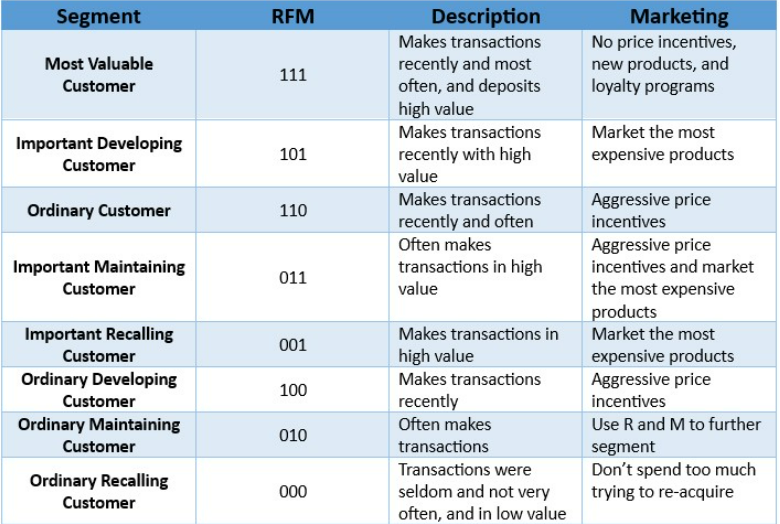

In [49]:
rfm['RFM'] = rfm['R'] + rfm['F'] + rfm['M']

conditions = [
    (rfm['RFM'] == '111'),
    (rfm['RFM'] == '110'),
    (rfm['RFM'] == '101'),
    (rfm['RFM'] == '011'),
    (rfm['RFM'] == '100'),
    (rfm['RFM'] == '010'),
    (rfm['RFM'] == '001'),
    (rfm['RFM'] == '000'),
    
]

values = [
    'Most Valuable Customer',
    'Ordinary Customer',
    'Important Developing Customer',
    'Important Maintaining Customer',
    'Ordinary Developing Customer',
    'Ordinary Maintaining Customer',
    'Important Recalling Customer',
    'Ordinary Recalling Customer'
    ]

rfm['Class'] = np.select(conditions,values, default = '')

In [50]:
rfm

,CustomerID,R,F,M,RFM,Class
0,C1010011,1,1,1,111,Most Valuable Customer
1,C1010012,0,0,1,001,Important Recalling Customer
2,C1010014,0,1,1,011,Important Maintaining Customer
3,C1010018,1,0,0,100,Ordinary Developing Customer
4,C1010024,0,0,1,001,Important Recalling Customer
...,...,...,...,...,...,...
879352,C9099836,0,0,1,001,Important Recalling Customer
879353,C9099877,1,0,0,100,Ordinary Developing Customer
879354,C9099919,0,0,0,000,Ordinary Recalling Customer
879355,C9099941,0,0,0,000,Ordinary Recalling Customer


#### Visualize the classes distribution:

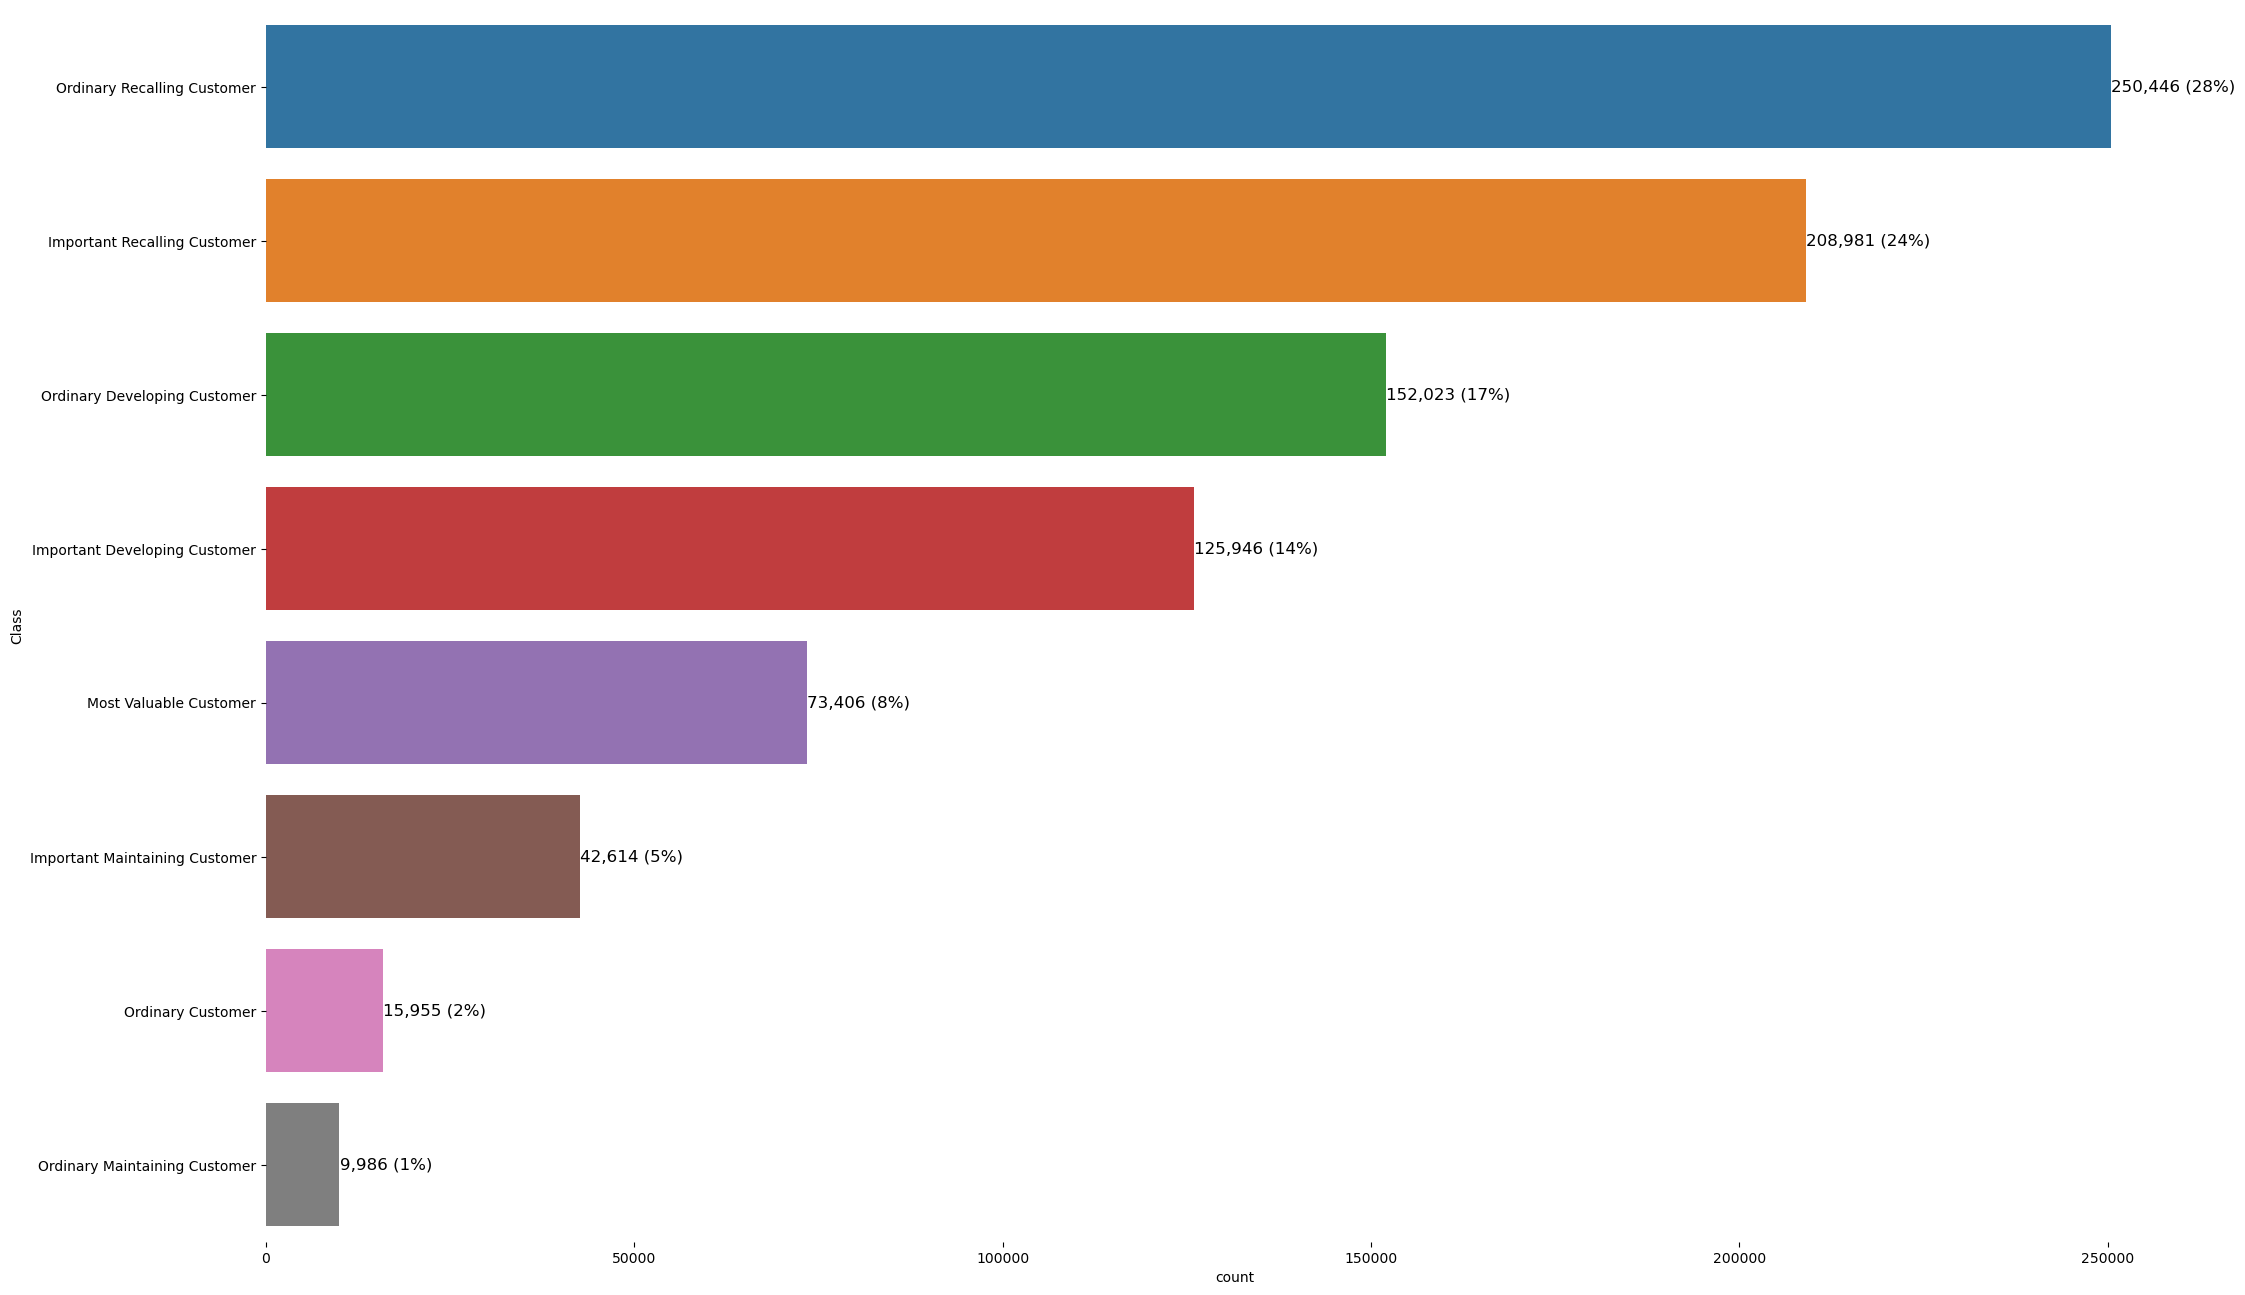

In [51]:
plt.figure(figsize = (25,16))
ax = sns.countplot(y = rfm.Class, order = rfm['Class'].value_counts().index)

abs_values = rfm['Class'].value_counts(ascending=False)
rel_values = rfm['Class'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]:,} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

# Remove figure border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2, lbls[i], va='center', size=12)

## Pareto Analysis

Phân tích Pareto, còn được gọi là quy tắc 80/20 hoặc nguyên tắc Pareto, là một kỹ thuật được sử dụng trong việc ra quyết định và giải quyết vấn đề nhằm ưu tiên và tập trung nỗ lực vào các yếu tố hoặc vấn đề quan trọng nhất có tác động lớn nhất. Nó được đặt theo tên của nhà kinh tế học người Ý Vilfredo Pareto, người đã quan sát thấy rằng khoảng 80% tài sản ở Ý thuộc sở hữu của 20% dân số.

Hãy để chúng tôi kiểm tra xem khách hàng có giá trị có đóng góp nhiều nhất vào khối lượng giao dịch hay không.

In [52]:
# Nhóm theo class RFM và tổng hợp khối lượng giao dịch của từng class
pareto_df = df.groupby(['CustomerID']).agg({'TransactionAmount (INR)':'sum'}).reset_index()
pareto_df.head()

,CustomerID,TransactionAmount (INR)
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0


In [53]:
# Sắp xếp các giá trị theo thứ tự giảm dần
pareto_df = pareto_df.merge(rfm[['CustomerID','Class']], on = 'CustomerID')
pareto_df = pareto_df[['Class', 'TransactionAmount (INR)']].groupby('Class').sum()
pareto_df = pareto_df.sort_values(by = 'TransactionAmount (INR)', ascending = False)
pareto_df

,TransactionAmount (INR)
Class,
Important Recalling Customer,6.700889e+08
Important Developing Customer,4.039658e+08
Most Valuable Customer,2.990222e+08
Important Maintaining Customer,1.686050e+08
Ordinary Recalling Customer,5.082979e+07
Ordinary Developing Customer,3.116865e+07
Ordinary Customer,4.664917e+06
Ordinary Maintaining Customer,2.889789e+06


In [54]:
# thêm cột cumulative percentage 
pareto_df['Trans_Percent'] = round(pareto_df['TransactionAmount (INR)'] / pareto_df['TransactionAmount (INR)'].sum()*100,2)
pareto_df["Cum_Percent"] = round(pareto_df['TransactionAmount (INR)'].cumsum() / pareto_df['TransactionAmount (INR)'].sum()*100,2)
pareto_df

,TransactionAmount (INR),Trans_Percent,Cum_Percent
Class,,,
Important Recalling Customer,6.700889e+08,41.08,41.08
Important Developing Customer,4.039658e+08,24.76,65.84
Most Valuable Customer,2.990222e+08,18.33,84.17
Important Maintaining Customer,1.686050e+08,10.34,94.51
Ordinary Recalling Customer,5.082979e+07,3.12,97.63
Ordinary Developing Customer,3.116865e+07,1.91,99.54
Ordinary Customer,4.664917e+06,0.29,99.82
Ordinary Maintaining Customer,2.889789e+06,0.18,100.00


### Tạo pareto chart

Biểu đồ Pareto bên dưới trực quan hóa cách tích lũy khối lượng giao dịch trên các lớp RFM

C:\Users\Duc\AppData\Local\Temp\ipykernel_24312\2080593636.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_labels, size = 12)


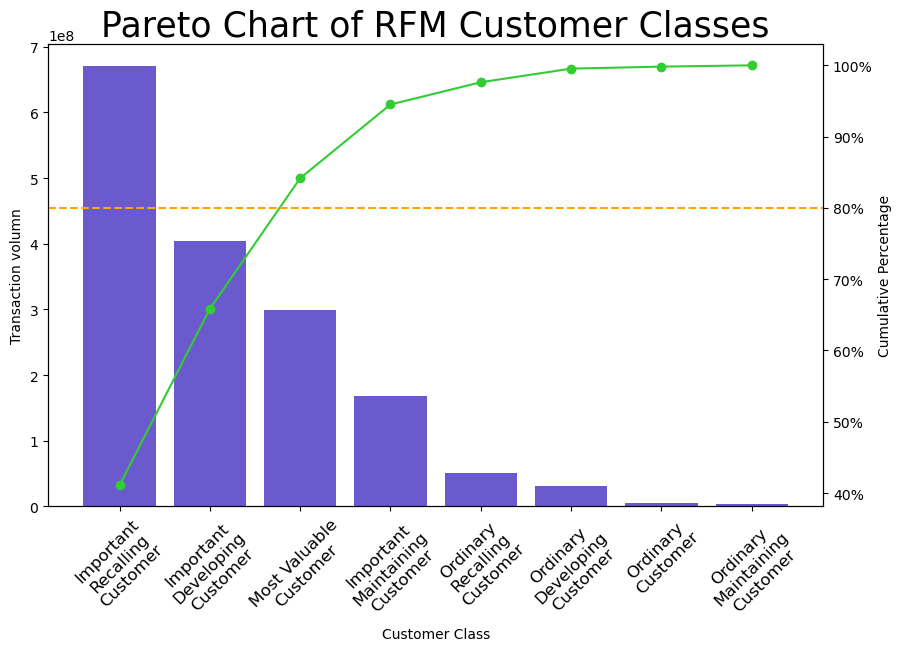

In [55]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize = (10, 6))

# Bar plot of transaction volume
ax.bar(pareto_df.index, pareto_df['TransactionAmount (INR)'], color = 'slateblue')
ax.set_title('Pareto Chart of RFM Customer Classes', size = 25, y = 1)
ax.set_xlabel('Customer Class')
ax.set_ylabel('Transaction volumn')
plt.xticks(rotation = 45)

# Line plot of accumulated volume percentage

ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['Cum_Percent'], color = 'limegreen', marker = 'o')
ax2.axhline(80, color = "orange", linestyle = "dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")


# Wrap x-axis tick labels
import textwrap
wrapped_labels = [textwrap.fill(label, 15) for label in pareto_df.index]
ax.set_xticklabels(wrapped_labels, size = 12)


plt.show()

Từ biểu đồ, ta có thể kết luận rằng nhóm khách hàng "Important Developing Customer", "Most Valuable Customer", và "Important Recalling Customer" đã đóng góp vào hơn  80% tổng khối lượng giao dịch. Những khách hàng này chiếm 50% tổng số khách hàng. Con số dù không phải là 20% nhưng vẫn cho thấy tầm quan trọng của việc phân khúc khách hàng và dịch vụ hướng tới. Chúng ta cần tập trung hầu hết các nguồn lực để cung cấp sản phẩm và dịch vụ tốt hơn cho tầng lớp này